In [1]:
# Predictive modelling: to determine factors leading to a Fraudulent insurance claim

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style("whitegrid")

In [4]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/fraud_oracle.csv')

In [5]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [6]:
# to check for missing variables
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
# to check for duplicates
duplicates = df[df.duplicated()]

In [8]:
duplicates

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


In [9]:
# dataset contains 15,420 insurance claims
len(df)

15420

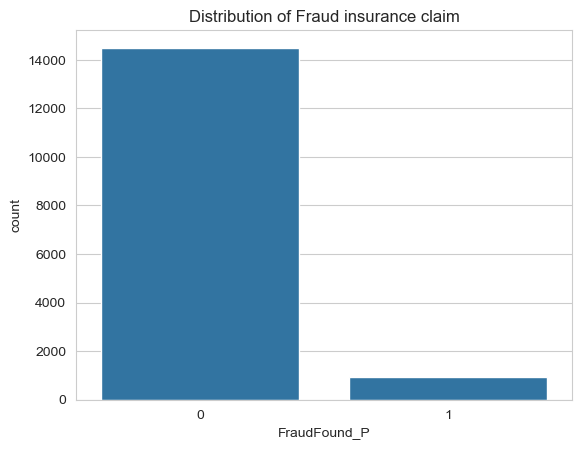

In [10]:
# to plot distribution of target variable, 'FraudFound_P'
sns.countplot(data=df, x='FraudFound_P')
plt.title('Distribution of Fraud insurance claim');

In [11]:
df['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

In [12]:
# only 5.98% are Fraudulen cases
100 * df['FraudFound_P'].value_counts()/len(df)

FraudFound_P
0    94.014267
1     5.985733
Name: count, dtype: float64

In [13]:
# to print categorical variables
df.select_dtypes('object')

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Jun,Saturday,Toyota,Rural,Friday,Jul,Male,Married,Third Party,Sedan - Liability,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,Friday,Toyota,Urban,Tuesday,Nov,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,Nov,Thursday,Pontiac,Urban,Friday,Dec,Male,Married,Policy Holder,Sedan - Liability,...,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,Nov,Thursday,Toyota,Rural,Friday,Dec,Male,Single,Policy Holder,Sedan - Collision,...,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,Dec,Monday,Toyota,Urban,Thursday,Dec,Female,Married,Third Party,Sedan - All Perils,...,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


In [14]:
df.select_dtypes('object').columns

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [15]:
df['Month'].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
       'Jul', 'May', 'Sep'], dtype=object)

In [16]:
month_order = ['Jan',
               'Feb',
               'Mar',
               'Apr',
               'May',
               'Jun',
               'Jul',
              'Aug',
              'Sep',
              'Oct',
              'Nov',
              'Dec']

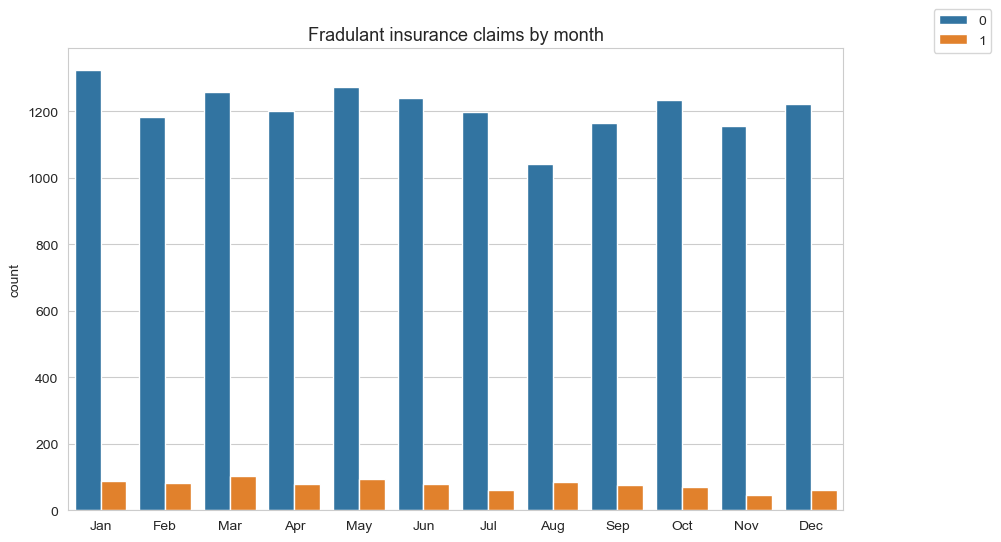

In [17]:
# March has the highest fraudulent claims, followed by May
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='Month', order = month_order ,hue = 'FraudFound_P')
plt.title('Fradulant insurance claims by month', fontsize=13)
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.xlabel("");

In [18]:
pd.DataFrame(df.groupby(['Month','FraudFound_P'])['FraudFound_P'].count())

FraudFound_P
Month FraudFound_P              
Apr   0                     1200
      1                       80
Aug   0                     1043
      1                       84
Dec   0                     1223
      1                       62
Feb   0                     1184
      1                       82
Jan   0                     1324
      1                       87
Jul   0                     1197
      1                       60
Jun   0                     1241
      1                       80
Mar   0                     1258
      1                      102
May   0                     1273
      1                       94
Nov   0                     1155
      1                       46
Oct   0                     1235
      1                       70
Sep   0                     1164
      1                       76

In [19]:
dayOfWeek_order = ['Monday',
                   'Tuesday',
                   'Wednesday',
                   'Thursday',
                   'Friday',
                   'Saturday',
                  'Sunday']

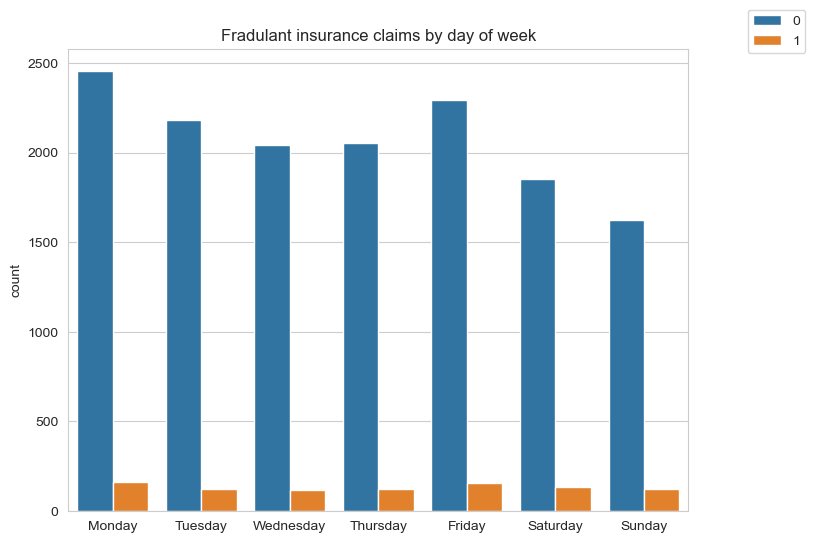

In [20]:
# Monday seems to have the highest fraudulant claims, followed by Friday
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='DayOfWeek', order=dayOfWeek_order, hue = 'FraudFound_P')
plt.title('Fradulant insurance claims by day of week')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.xlabel("");

In [21]:
# there is an outlier value '0'
df['MonthClaimed'].value_counts()

MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: count, dtype: int64

In [22]:
# to remove the outlier value
df = df[df['MonthClaimed'] !='0']

In [23]:
# to double- check again
df['MonthClaimed'].value_counts()

MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
Name: count, dtype: int64

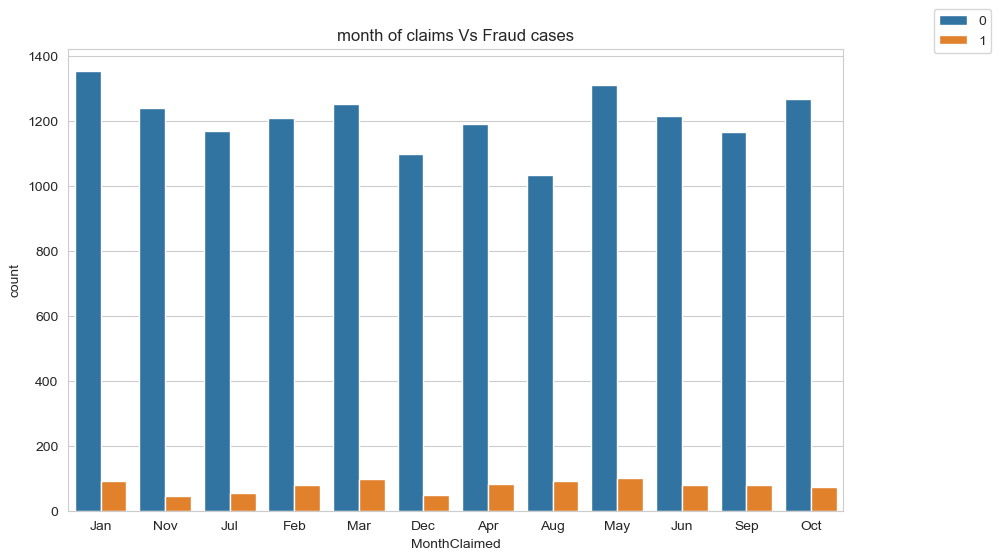

In [24]:
# Jan seems to have the highest fraudulant insurance claims
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='MonthClaimed', hue = 'FraudFound_P')
plt.title('month of claims Vs Fraud cases')
plt.legend(bbox_to_anchor=(1.2, 1.1));

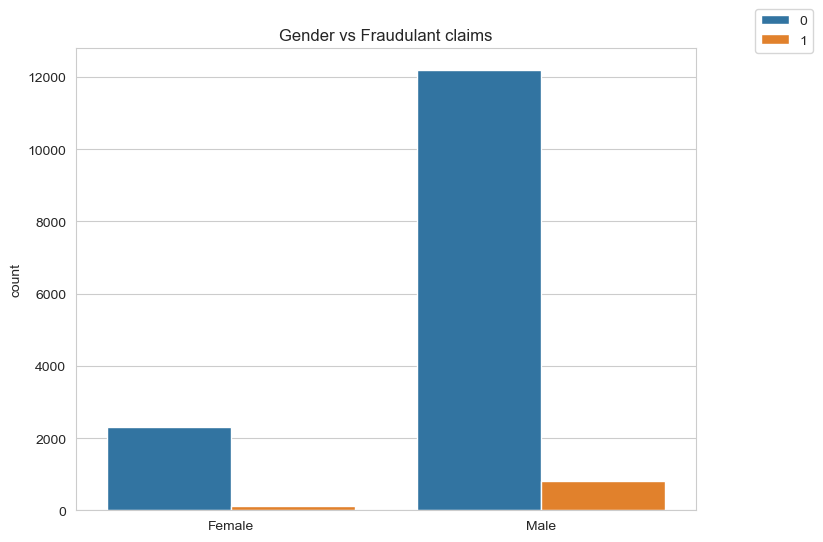

In [25]:
# Male drivers seems to make the most Fraudulant vehical insurance claim
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='Sex',hue = 'FraudFound_P')
plt.title('Gender vs Fraudulant claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.xlabel("");

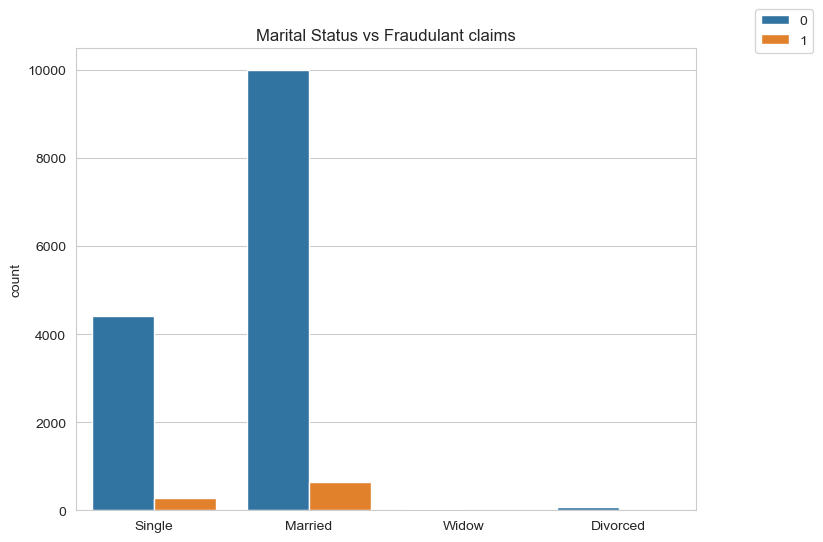

In [26]:
# customers who are married seems to make the most Fraudulant insurance claims
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='MaritalStatus',hue = 'FraudFound_P')
plt.title('Marital Status vs Fraudulant claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.xlabel("")
plt.show()

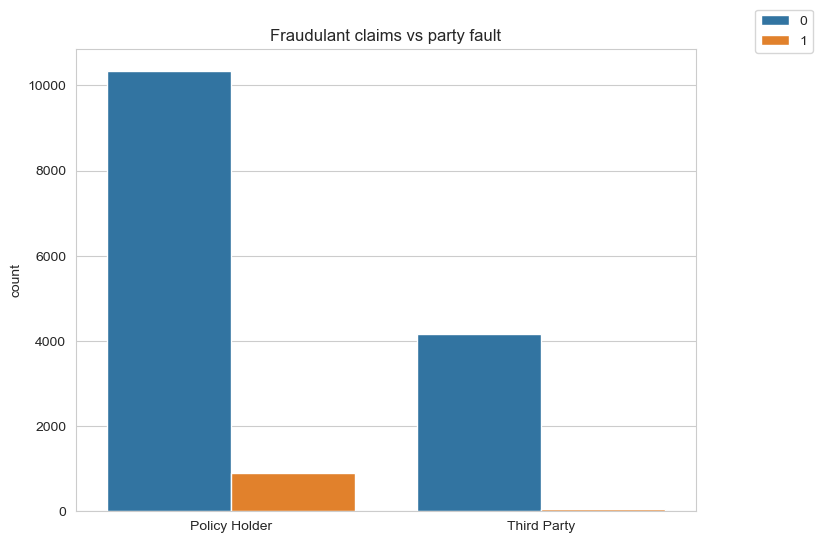

In [27]:
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='Fault',hue = 'FraudFound_P')
plt.title('Fraudulant claims vs party fault')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.xlabel("");

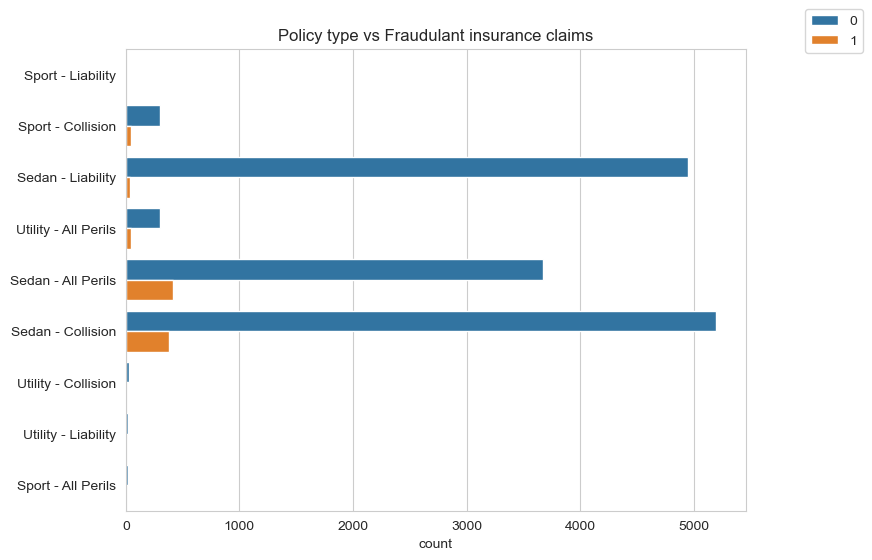

In [28]:
# it seems like 'Sedan' policy type has the most fradulant claims
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, y='PolicyType',hue = 'FraudFound_P')
plt.title('Policy type vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.ylabel("");

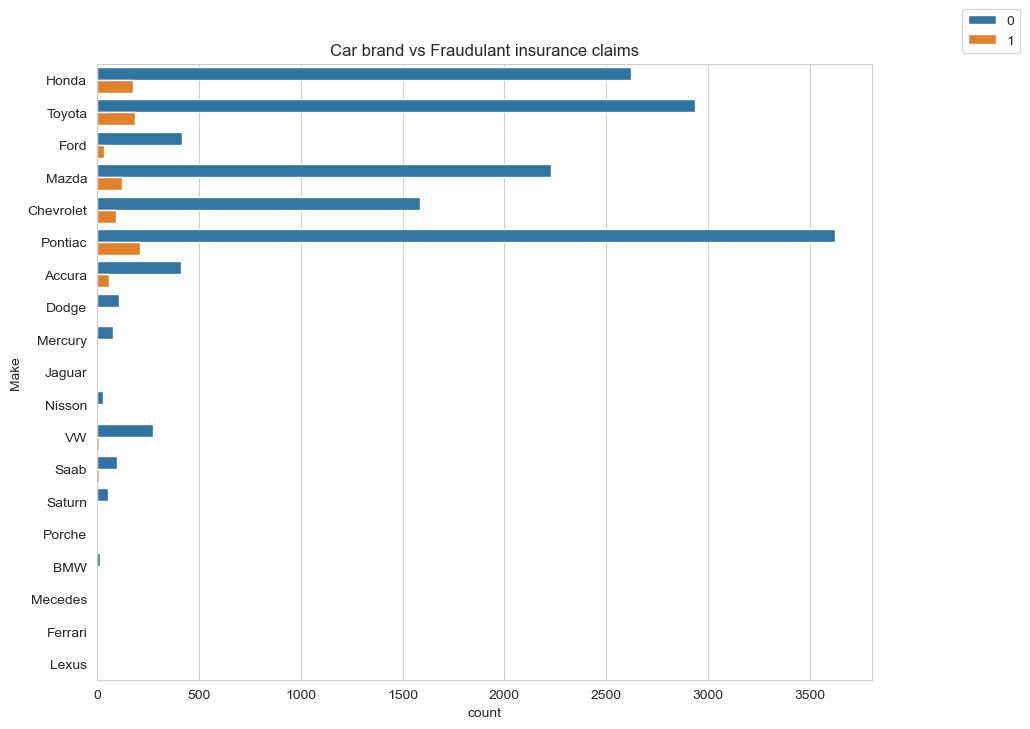

In [29]:
# 'Pontiac' seems to have the highest fraudulant insurance claims
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, y='Make',hue = 'FraudFound_P')
plt.title('Car brand vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

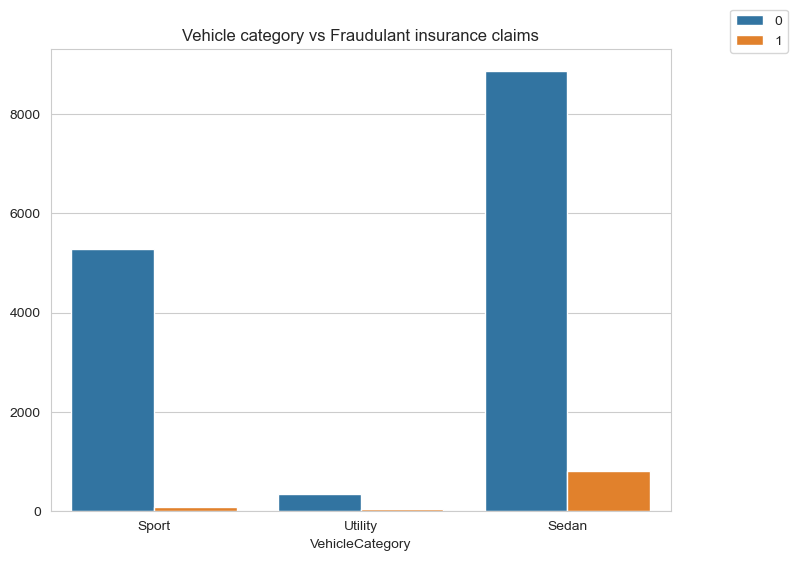

In [30]:
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='VehicleCategory',hue = 'FraudFound_P')
plt.title('Vehicle category vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.ylabel("");

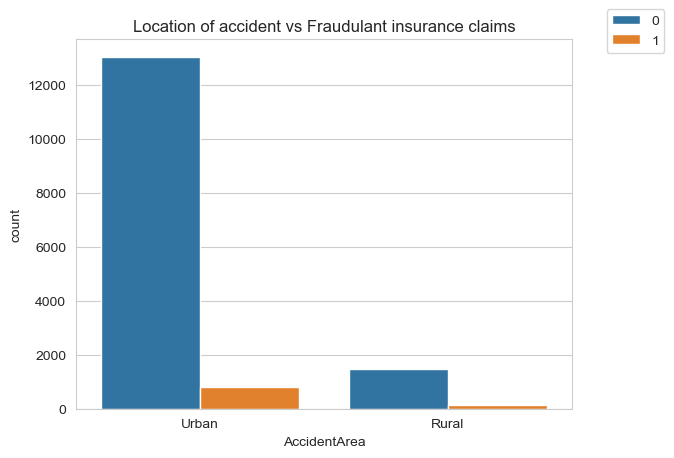

In [31]:
# the 'Urban' area sees the highest number of Fraudulant insurance claims
sns.countplot(data=df, x='AccidentArea',hue = 'FraudFound_P')
plt.title('Location of accident vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1));

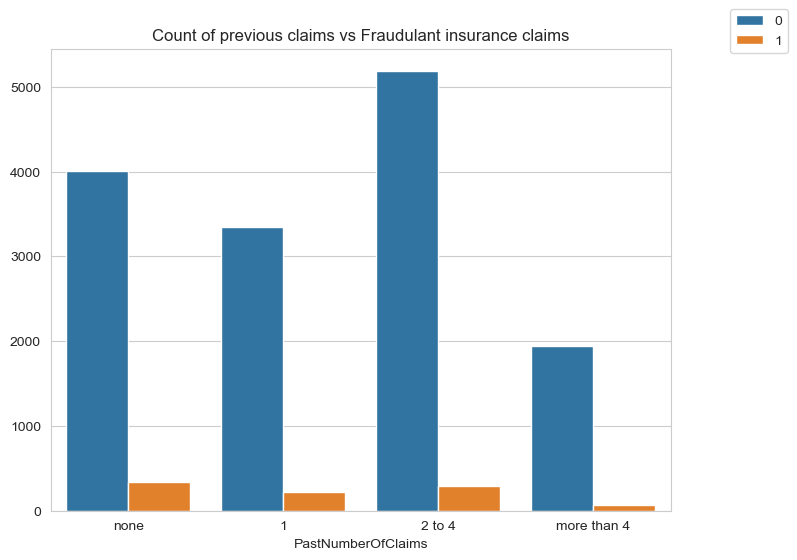

In [32]:
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='PastNumberOfClaims',hue = 'FraudFound_P')
plt.title('Count of previous claims vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.ylabel("");

In [33]:
df['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [34]:
ageOfVehicle_order = ['new',
                      '2 years',
                      '3 years',
                      '4 years',
                      '5 years',
                      '6 years',
                      '7 years',
                     'more than 7']

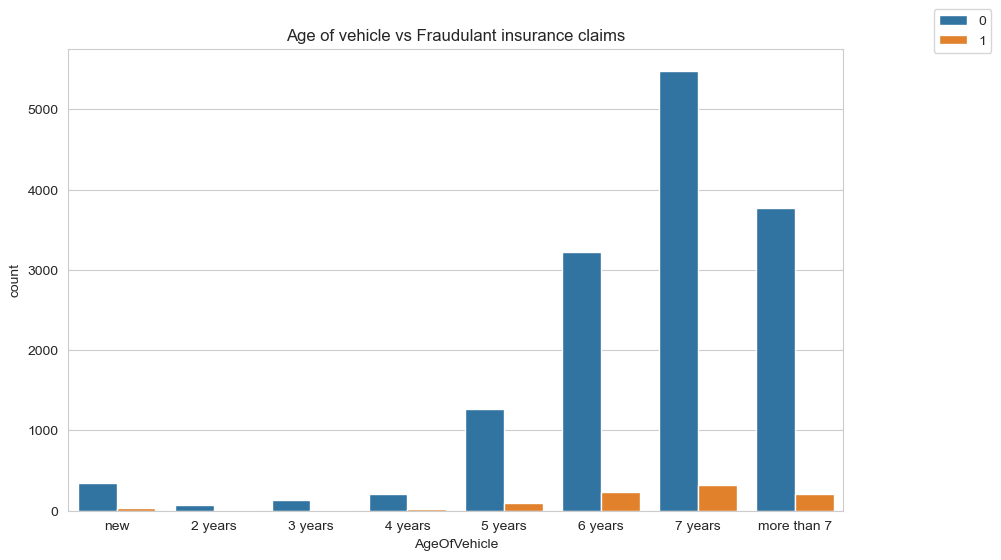

In [35]:
# it seems that the older the vehicle, the more likely the insurance claim is fradulant 
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='AgeOfVehicle', order= ageOfVehicle_order ,hue = 'FraudFound_P')
plt.title('Age of vehicle vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1));

In [36]:
df['AgeOfPolicyHolder'].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [37]:
age_policy_holder_order = ['16 to 17',
                           '18 to 20',
                           '21 to 25',
                           '26 to 30',
                           '31 to 35',
                           '36 to 40',
                           '41 to 50',
                           '51 to 65',
                           'over 65']

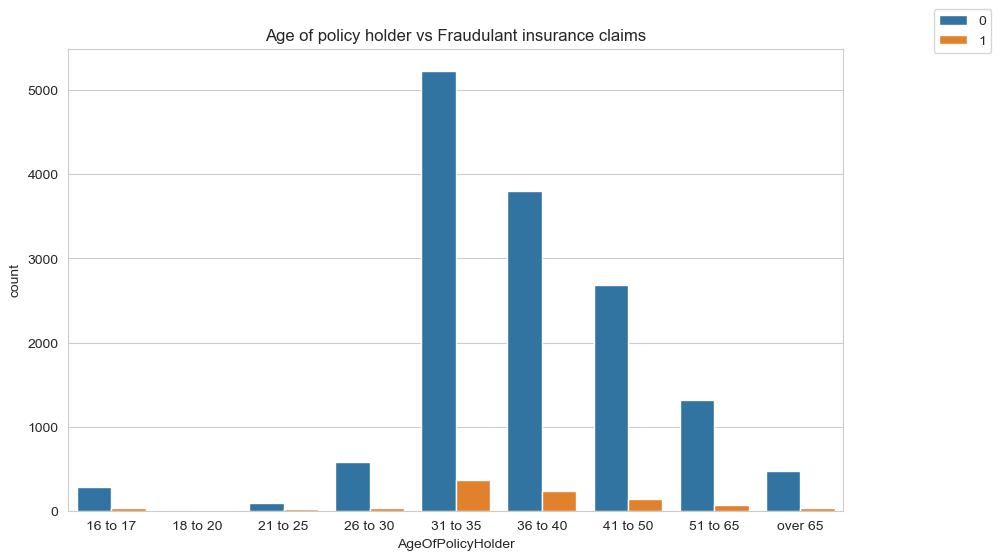

In [38]:
# Customers between 31 to 35 years makes the most fraudulant claims
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='AgeOfPolicyHolder', order = age_policy_holder_order, hue = 'FraudFound_P')
plt.title('Age of policy holder vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1));

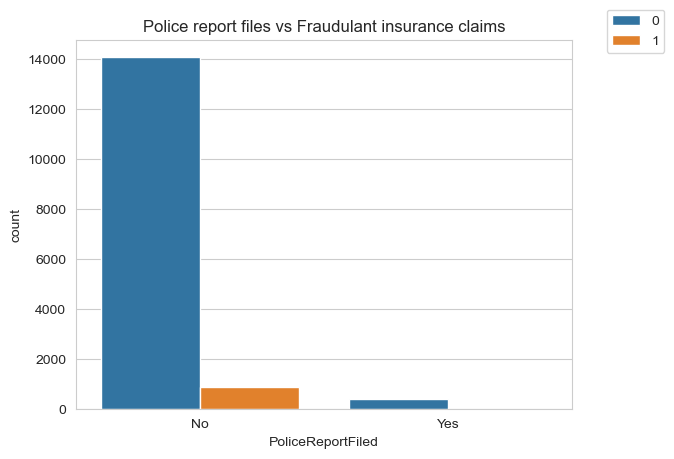

In [39]:
# for the majority of the fraudulant insurance claims, no policy report was made
sns.countplot(data=df, x='PoliceReportFiled', hue = 'FraudFound_P')
plt.title('Police report files vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

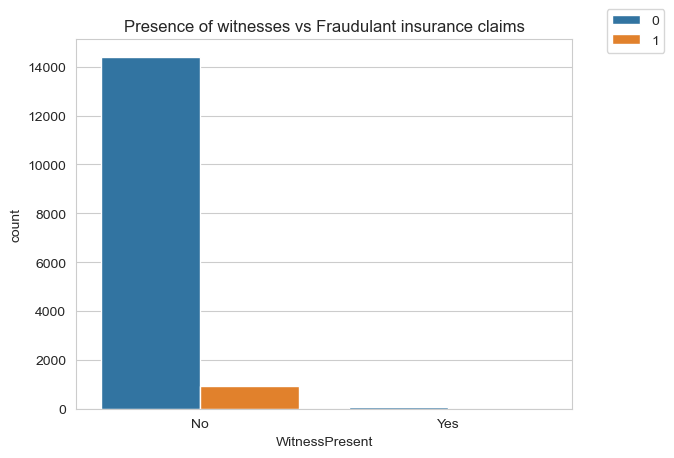

In [40]:
# majority has no presence of witnesses for Fraudulant claims
sns.countplot(data=df, x='WitnessPresent', hue = 'FraudFound_P')
plt.title('Presence of witnesses vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

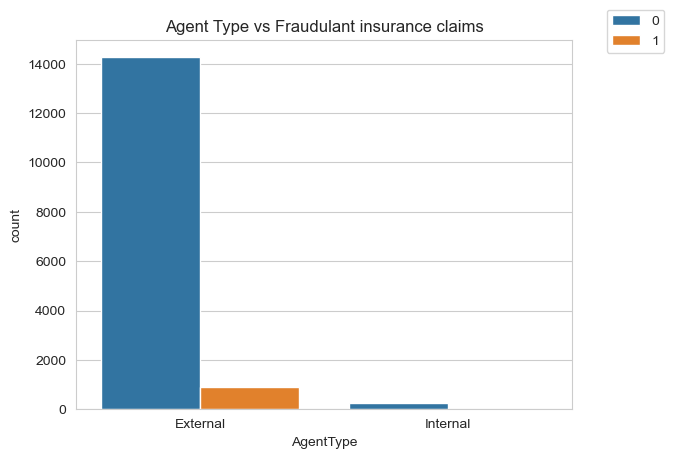

In [41]:
sns.countplot(data=df, x='AgentType', hue = 'FraudFound_P')
plt.title('Agent Type vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1));

In [42]:
df['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [43]:
num_cars_order = ['1 vehicle',
                  '2 vehicles',
                  '3 to 4',
                  '5 to 8',
                  'more than 8']

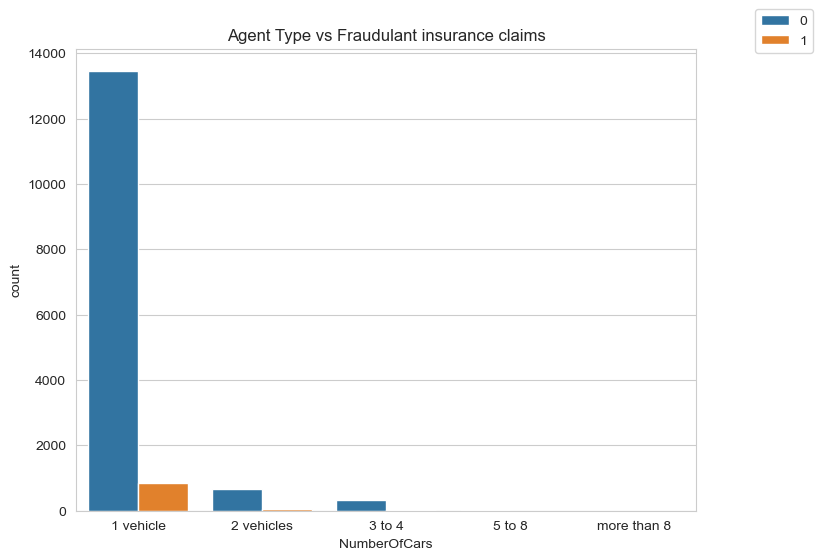

In [44]:
# customers with 1 car filed the most Fradulant insurance claims
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='NumberOfCars', order=num_cars_order, hue = 'FraudFound_P')
plt.title('Agent Type vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1));

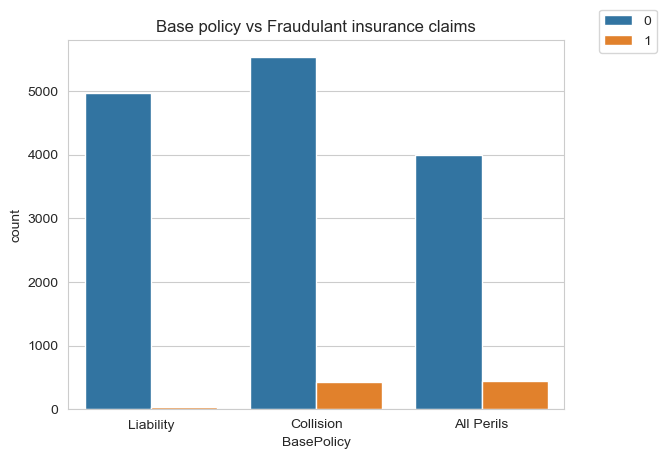

In [45]:
# Collision has the highest number of Fraudulant insurance claims
sns.countplot(data=df, x='BasePolicy', hue = 'FraudFound_P')
plt.title('Base policy vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1));

In [46]:
df['VehiclePrice'].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [47]:
vehicle_price_order = ['less than 20000',
                       '20000 to 29000',
                       '30000 to 39000',
                       '40000 to 59000',
                       '60000 to 69000',
                       'more than 69000']

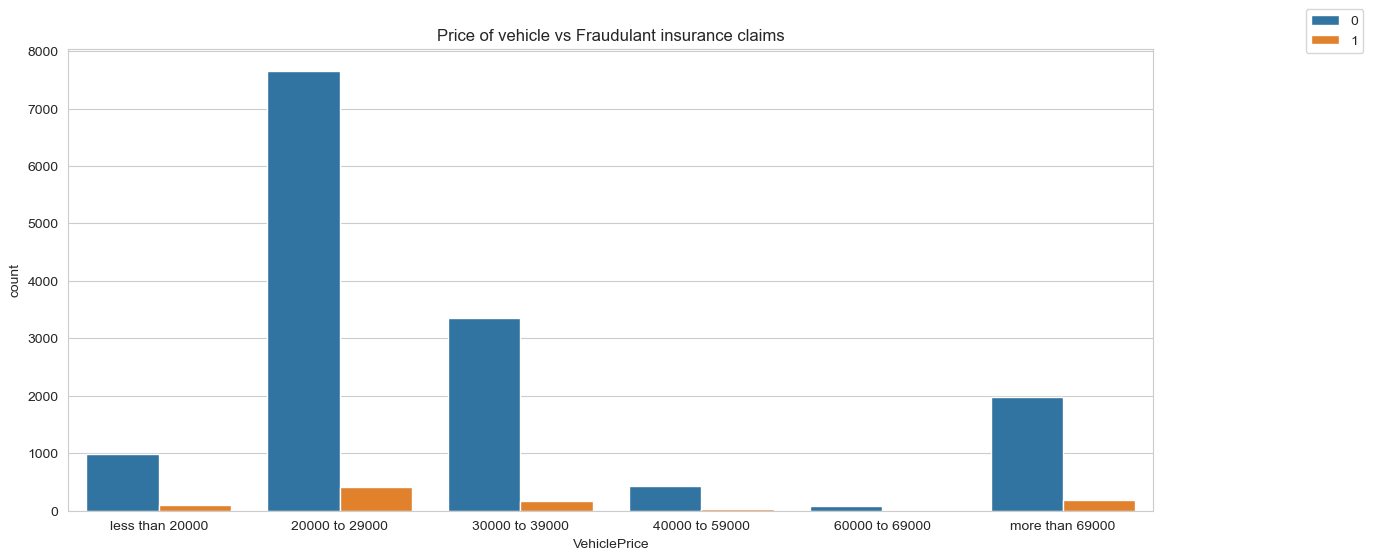

In [48]:
# most of the fraudulant insurance claims seems to be between $20,000 to $29,000
plt.figure(figsize=(14,6), dpi=100)
sns.countplot(data=df, x='VehiclePrice', order=vehicle_price_order ,hue = 'FraudFound_P')
plt.title('Price of vehicle vs Fraudulant insurance claims')
plt.legend(bbox_to_anchor=(1.2, 1.1));

In [49]:
df['Days_Policy_Accident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [50]:
dayspolicyaccident_order = ['none',
                            '1 to 7',
                            '8 to 15',
                            '15 to 30',
                            'more than 30']

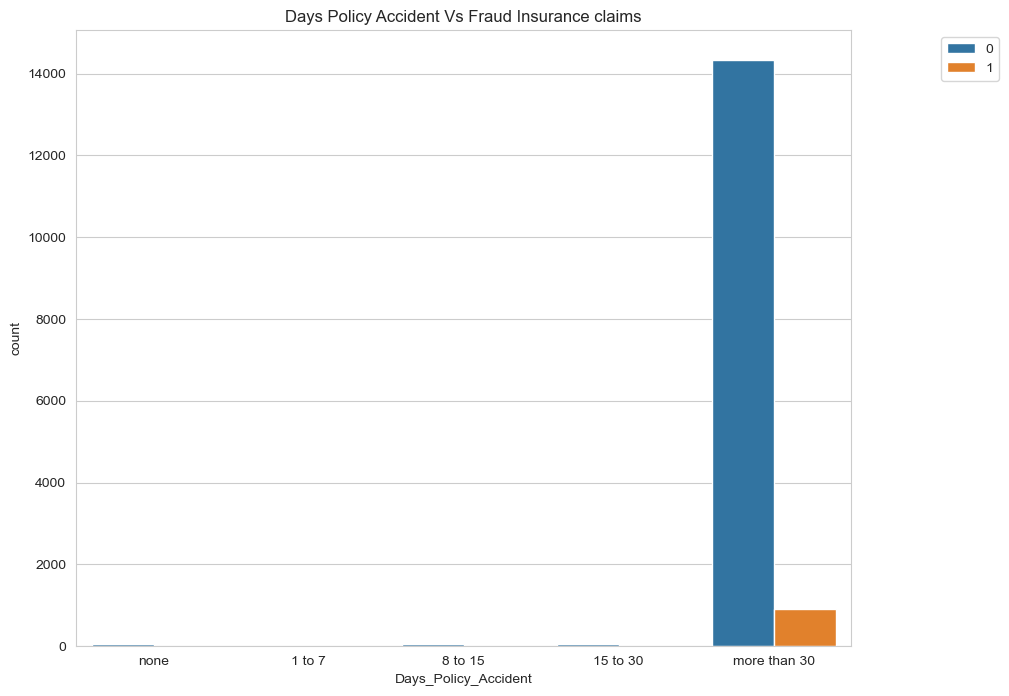

In [51]:
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, x='Days_Policy_Accident', order = dayspolicyaccident_order, hue='FraudFound_P')
plt.title('Days Policy Accident Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [52]:
df['Days_Policy_Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15'], dtype=object)

In [53]:
dayspolicyclaim_order = ['8 to 15',
                         '15 to 30',
                         'more than 30']

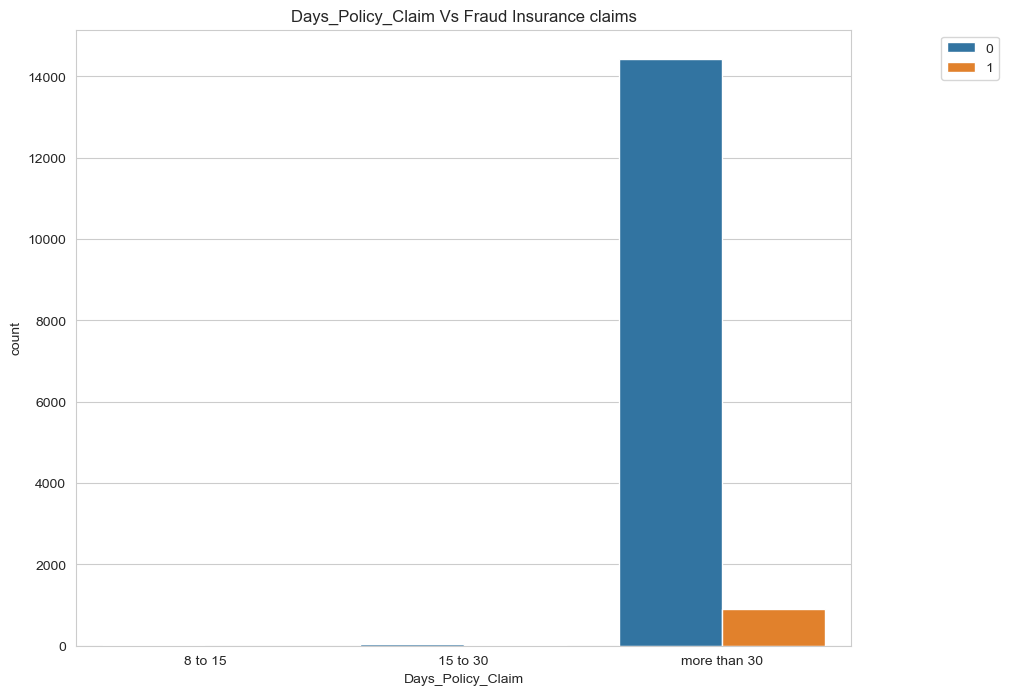

In [54]:
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, x='Days_Policy_Claim', order= dayspolicyclaim_order, hue='FraudFound_P')
plt.title('Days_Policy_Claim Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [55]:
df['AddressChange_Claim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [56]:
addresschangeclaim_order = ['no change',
                            'under 6 months',
                            '1 year',
                            '2 to 3 years',
                            '4 to 8 years']

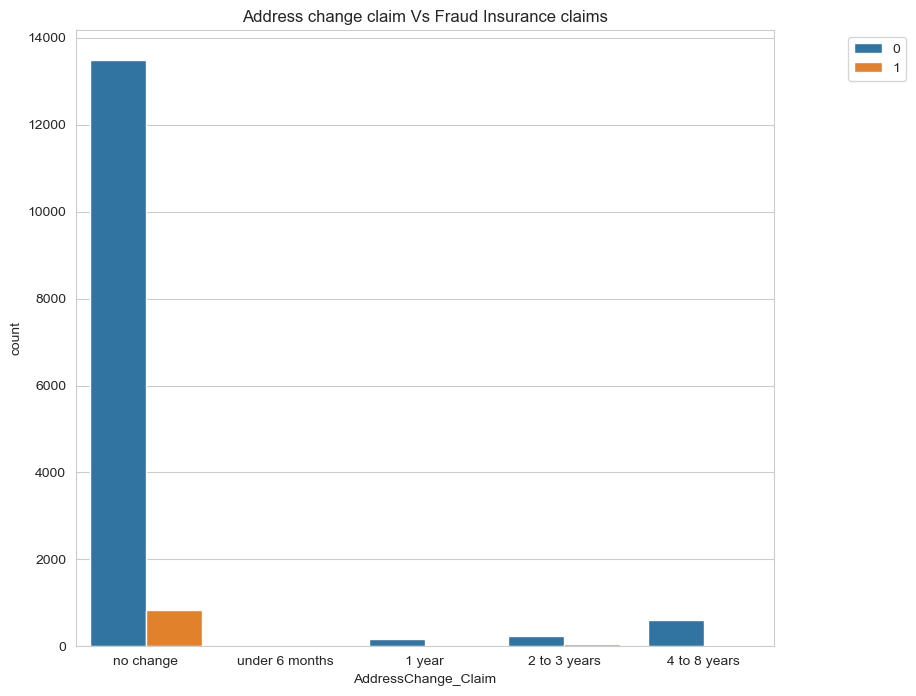

In [57]:
plt.figure(figsize=(9,8), dpi=100)
sns.countplot(data=df, x='AddressChange_Claim', order=addresschangeclaim_order, hue='FraudFound_P')
plt.title('Address change claim Vs Fraud Insurance claims')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [58]:
# to see the number of Vehical insurances claim by year
# 1994 has the highest vehicle insurance claim
pd.DataFrame(df['Year'].value_counts())

,count
Year,
1994,6141
1995,5195
1996,4083


In [59]:
# to select out numeric variables in the dataframe
df.select_dtypes(['int','float'])

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
0,5,1,21,0,1,12,300,1,1994
1,3,4,34,0,2,15,400,4,1994
2,5,2,47,0,3,7,400,3,1994
3,2,1,65,0,4,4,400,2,1994
4,5,2,27,0,5,3,400,1,1994
...,...,...,...,...,...,...,...,...,...
15415,4,5,35,1,15416,5,400,4,1996
15416,5,1,30,0,15417,11,400,3,1996
15417,5,1,24,1,15418,4,400,4,1996
15418,1,2,34,0,15419,6,400,4,1996


In [60]:
# to see correlation of numeric variables against target variable:'FraudFound_P'
# 'Deductible' has the highest correlation against 'FraudFound_P'
df.select_dtypes(['int','float']).corr()['FraudFound_P'].sort_values(ascending=False)

FraudFound_P          1.000000
Deductible            0.017345
DriverRating          0.007259
WeekOfMonthClaimed   -0.005783
RepNumber            -0.007529
WeekOfMonth          -0.011872
PolicyNumber         -0.020369
Year                 -0.024778
Age                  -0.029798
Name: FraudFound_P, dtype: float64

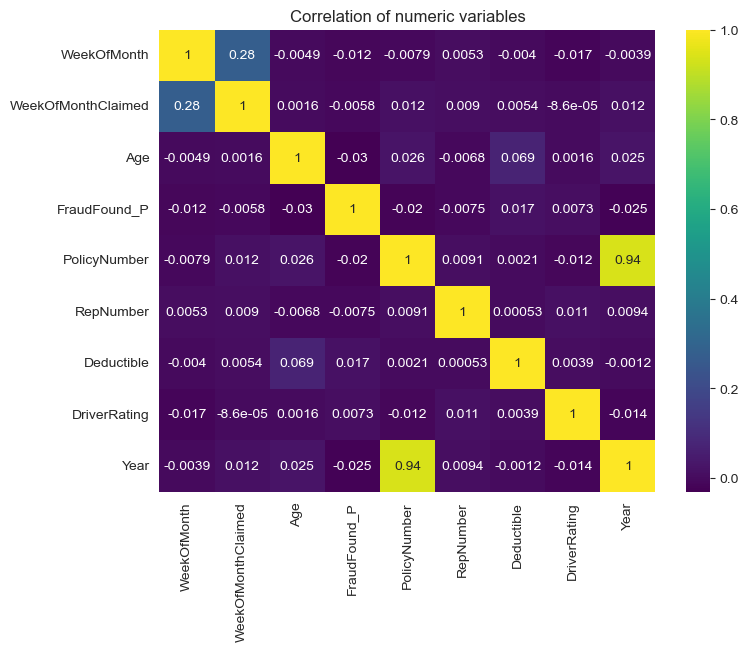

In [61]:
# to visualise in a correlation plot
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(data=df.select_dtypes(['int','float']).corr(), annot=True, cmap='viridis')
plt.title('Correlation of numeric variables');

In [62]:
# to remove unimportant variable before machine learning algorithm
df = df.drop(['Month','WeekOfMonth','WeekOfMonthClaimed','Age','PolicyNumber','RepNumber'], axis=1)

In [63]:
# to define X and y
X = df.drop('FraudFound_P', axis=1)

In [64]:
# to convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [65]:
y = df['FraudFound_P']

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
# testing data= 20%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [68]:
# split into test-validation set (20%), Validation (10%) and test (10%) set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101, stratify= y_temp)

In [69]:
# to initialize the standard scaler
scaler = StandardScaler()

In [70]:
# to scale, fit transform on the X training data to prevent leakage to the y test data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.fit_transform(X_val)  # Validation set
scaled_X_test = scaler.transform(X_test) 

In [71]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [72]:
# to initialize a decision tree classifier
dt = DecisionTreeClassifier()

In [73]:
# to define the decision tree parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'], # Measure for split quality
    'max_depth': [None, 10, 20, 30, 40, 50], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4] # Minimum samples required at a leaf node
}


In [74]:
# Set up GridSearchCV
dt_clf = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1,
                     scoring='accuracy')

In [75]:
# Fit GridSearchCV onto the X training data
dt_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [76]:
# Decision tree Best parameter score
print("Best parameters found: ", dt_clf.best_params_)
print("Best score found: ", dt_clf.best_score_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score found:  0.9382245642480745


In [77]:
dt_model = dt_clf.best_estimator_

In [78]:
# to predict on X validation set
dt_val_pred = dt_model.predict(scaled_X_val)

# predict_proba to obtain the predicted probabilities for the validation data, focusing on the probability of positive class(1): Survive
dt_val_pred_proba = dt_model.predict_proba(scaled_X_val)[:, 1]

In [79]:
# import all evaluation matrics for classification models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [80]:
# to calculate metrics for Decision Tree validation set
dt_val_accuracy = accuracy_score(y_val, dt_val_pred)
dt_val_precision = precision_score(y_val, dt_val_pred)
dt_val_recall = recall_score(y_val, dt_val_pred)
dt_val_f1 = f1_score(y_val, dt_val_pred)
dt_val_roc_auc = roc_auc_score(y_val, dt_val_pred_proba)

print("Decision Tree Classifier Validation Metrics:")
print(f'Validation Accuracy: {dt_val_accuracy:.4f}')
print(f'Validation Precision: {dt_val_precision:.4f}')
print(f'Validation Recall: {dt_val_recall:.4f}')
print(f'Validation F1 Score: {dt_val_f1:.4f}')
print(f'Validation ROC AUC: {dt_val_roc_auc:.4f}')

Decision Tree Classifier Validation Metrics:
Validation Accuracy: 0.9410
Validation Precision: 0.5455
Validation Recall: 0.0652
Validation F1 Score: 0.1165
Validation ROC AUC: 0.8297


In [81]:
dt_model = dt_clf.best_estimator_

In [82]:
# Decision tree, to predict on the X testing set
dt_test_pred = dt_model.predict(scaled_X_test)

# predict_proba to obtain the predicted probabilities for the validation data, focusing on the probability of positive class(1): Survive
dt_test_pred_proba = dt_model.predict_proba(scaled_X_test)[:, 1]

In [83]:
# to calculate and print the classification metrics for Decision tree
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
dt_test_precision = precision_score(y_test, dt_test_pred)
dt_test_recall = recall_score(y_test, dt_test_pred)
dt_test_f1 = f1_score(y_test, dt_test_pred)
dt_test_roc_auc = roc_auc_score(y_test, dt_test_pred_proba)

print("Decision Tree Classifier Test Metrics:")
print(f'test Accuracy: {dt_test_accuracy:.4f}')
print(f'test Precision: {dt_test_precision:.4f}')
print(f'test Recall: {dt_test_recall:.4f}')
print(f'test F1 Score: {dt_test_f1:.4f}')
print(f'test ROC AUC: {dt_test_roc_auc:.4f}')

Decision Tree Classifier Test Metrics:
test Accuracy: 0.9384
test Precision: 0.4000
test Recall: 0.0430
test F1 Score: 0.0777
test ROC AUC: 0.7578


In [84]:
# to initialize an instance of Random Forest model
rf = RandomForestClassifier()

In [85]:
# Define parameter grid (Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300, 400],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples required at a leaf node 
    'max_features': ['sqrt', 'log2']   # Number of features to consider for the best split
}

In [86]:
# Set up GridSearchCV
rf_clf = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

In [87]:
# to fit the random forest classifier to the training data
rf_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,400


In [88]:
# Print Best parameters and score for Random Forest model
print("Best parameters found: ", rf_clf.best_params_)
print("Best score found: ", rf_clf.best_score_)

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best score found:  0.940737738143494


In [89]:
rf_model = rf_clf.best_estimator_

In [90]:
# to predict on the X validation set
rf_val_pred = rf_model.predict(scaled_X_val)

# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
rf_val_pred_proba = rf_model.predict_proba(scaled_X_val)[:, 1]

In [91]:
# to calculate metrics for Random Forest validation set
rf_val_accuracy = accuracy_score(y_val, rf_val_pred)
rf_val_precision = precision_score(y_val, rf_val_pred)
rf_val_recall = recall_score(y_val, rf_val_pred)
rf_val_f1 = f1_score(y_val, rf_val_pred)
rf_val_roc_auc = roc_auc_score(y_val, rf_val_pred_proba)

print("Random Forest Classifier Validation Metrics:")
print(f'Validation Accuracy: {rf_val_accuracy:.4f}')
print(f'Validation Precision: {rf_val_precision:.4f}')
print(f'Validation Recall: {rf_val_recall:.4f}')
print(f'Validation F1 Score: {rf_val_f1:.4f}')
print(f'Validation ROC AUC: {rf_val_roc_auc:.4f}')

Random Forest Classifier Validation Metrics:
Validation Accuracy: 0.9429
Validation Precision: 1.0000
Validation Recall: 0.0435
Validation F1 Score: 0.0833
Validation ROC AUC: 0.8262


In [92]:
# to predict on X testing set, Random Forest
rf_test_pred = rf_model.predict(scaled_X_test)

# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
rf_test_pred_proba = rf_model.predict_proba(scaled_X_test)[:, 1]

In [93]:
# to calculate and print the classification metrics for Random Forest
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
rf_test_precision = precision_score(y_test, rf_test_pred)
rf_test_recall = recall_score(y_test, rf_test_pred)
rf_test_f1 = f1_score(y_test, rf_test_pred)
rf_test_roc_auc = roc_auc_score(y_test, rf_test_pred_proba)

print("Random Forest Classifier Test Metrics:")
print(f'test Accuracy: {rf_test_accuracy:.4f}')
print(f'test Precision: {rf_test_precision:.4f}')
print(f'test Recall: {rf_test_recall:.4f}')
print(f'test F1 Score: {rf_test_f1:.4f}')
print(f'test ROC AUC: {rf_test_roc_auc:.4f}')

Random Forest Classifier Test Metrics:
test Accuracy: 0.9397
test Precision: 0.5000
test Recall: 0.0108
test F1 Score: 0.0211
test ROC AUC: 0.8087


In [94]:
# to build an AdaBoost classifier
ada = AdaBoostClassifier()

In [95]:
# Define the parameter grid, Ada Boost
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME']
}

In [96]:
# Initialize GridSearchCV with 5-fold cross-validation
ada_clf = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [97]:
# Fit the AdaBoost model on the training data
ada_clf.fit(scaled_X_train, y_train)

C:\Users\miche\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


,estimator,AdaBoostClassifier()
,param_grid,"{'algorithm': ['SAMME'], 'learning_rate': [0.01, 0.1, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [98]:
# Print the best parameters and best score, AdaBoost model
print("Best Parameters:", ada_clf.best_params_)
print("Best Cross-Validation Accuracy:", ada_clf.best_score_)

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9401702472638831


In [99]:
ada_model = ada_clf.best_estimator_

In [100]:
# to predict on the X validation set, AdaBoost
ada_val_pred = ada_model.predict(scaled_X_val)

# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
ada_val_pred_proba = ada_model.predict_proba(scaled_X_val)[:, 1]

In [101]:
# to calculate metrics for AdaBoost validation set
ada_val_accuracy = accuracy_score(y_val, ada_val_pred)
ada_val_precision = precision_score(y_val, ada_val_pred)
ada_val_recall = recall_score(y_val, ada_val_pred)
ada_val_f1 = f1_score(y_val, ada_val_pred)
ada_val_roc_auc = roc_auc_score(y_val, ada_val_pred)

print("AdaBoost Classifier Validation Metrics:")
print(f'Validation Accuracy: {ada_val_accuracy:.4f}')
print(f'Validation Precision: {ada_val_precision:.4f}')
print(f'Validation Recall: {ada_val_recall:.4f}')
print(f'Validation F1 Score: {ada_val_f1:.4f}')
print(f'Validation ROC AUC: {ada_val_roc_auc:.4f}')

AdaBoost Classifier Validation Metrics:
Validation Accuracy: 0.9403
Validation Precision: 0.0000
Validation Recall: 0.0000
Validation F1 Score: 0.0000
Validation ROC AUC: 0.5000


C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [102]:
ada_model = ada_clf.best_estimator_

In [103]:
# to predict on the X testing set, AdaBoost
ada_test_pred = ada_clf.predict(scaled_X_test)

# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
ada_test_pred_proba = ada_model.predict_proba(scaled_X_test)[:,1]

In [104]:
# to calculate metrics for AdaBoost testing set
ada_test_accuracy = accuracy_score(y_test, ada_test_pred)
ada_test_precision = precision_score(y_test, ada_test_pred)
ada_test_recall = recall_score(y_test, ada_test_pred)
ada_test_f1 = f1_score(y_test, ada_test_pred)
ada_test_roc_auc = roc_auc_score(y_test, ada_test_pred_proba)

print("AdaBoost Classifier Testing Metrics:")
print(f'Testing Accuracy: {ada_test_accuracy:.4f}')
print(f'Testing Precision: {ada_test_precision:.4f}')
print(f'Testing Recall: {ada_test_recall:.4f}')
print(f'Testing F1 Score: {ada_test_f1:.4f}')
print(f'Testing ROC AUC: {ada_test_roc_auc:.4f}')

AdaBoost Classifier Testing Metrics:
Testing Accuracy: 0.9397
Testing Precision: 0.0000
Testing Recall: 0.0000
Testing F1 Score: 0.0000
Testing ROC AUC: 0.5000


C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [105]:
# to initiate Gradient Boost Classifier
gbc = GradientBoostingClassifier()

In [106]:
# Define the parameter grid, Gradient Boost classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

In [107]:
# Initialize GridSearchCV with 5-fold cross-validation
gbc_clf = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [108]:
# Fit the model on the training data, GBC
gbc_clf.fit(scaled_X_train, y_train)

,estimator,GradientBoostingClassifier()
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 4, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [109]:
# Print the Gradient Boost best parameters and best score
print("Best Parameters:", gbc_clf.best_params_)
print("Best Cross-Validation Accuracy:", gbc_clf.best_score_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9426023510336442


In [110]:
gbc_model = gbc_clf.best_estimator_

In [111]:
# to predict on X validation set, Gradient Boost
gbc_val_pred = gbc_model.predict(scaled_X_val)

# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
gbc_val_pred_proba = gbc_model.predict_proba(scaled_X_val)[:,1]

In [112]:
# to calculate metrics for Gradient Boost validation set
gbc_val_accuracy = accuracy_score(y_val, gbc_val_pred)
gbc_val_precision = precision_score(y_val, gbc_val_pred)
gbc_val_recall = recall_score(y_val, gbc_val_pred)
gbc_val_f1 = f1_score(y_val, gbc_val_pred)
gbc_val_roc_auc = roc_auc_score(y_val, gbc_val_pred_proba)

print("Gradient Boost Classifier Validation Metrics:")
print(f'Validation Accuracy: {gbc_val_accuracy:.4f}')
print(f'Validation Precision: {gbc_val_precision:.4f}')
print(f'Validation Recall: {gbc_val_recall:.4f}')
print(f'Validation F1 Score: {gbc_val_f1:.4f}')
print(f'Validation ROC AUC: {gbc_val_roc_auc:.4f}')

Gradient Boost Classifier Validation Metrics:
Validation Accuracy: 0.9429
Validation Precision: 1.0000
Validation Recall: 0.0435
Validation F1 Score: 0.0833
Validation ROC AUC: 0.8470


In [113]:
gbc_model = gbc_clf.best_estimator_

In [114]:
# to predict on X test set, Gradient Boost
gbc_test_pred = gbc_model.predict(scaled_X_test)

# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
gbc_test_pred_proba = gbc_model.predict_proba(scaled_X_test)[:,1]

In [115]:
# to calculate metrics for Gradient Boost validation set
gbc_test_accuracy = accuracy_score(y_test, gbc_test_pred)
gbc_test_precision = precision_score(y_test, gbc_test_pred)
gbc_test_recall = recall_score(y_test, gbc_test_pred)
gbc_test_f1 = f1_score(y_test, gbc_test_pred)
gbc_test_roc_auc = roc_auc_score(y_test, gbc_test_pred_proba)

print("Gradient Boost Classifier Test Metrics:")
print(f'Test Accuracy: {gbc_val_accuracy:.4f}')
print(f'Test Precision: {gbc_val_precision:.4f}')
print(f'Test Recall: {gbc_val_recall:.4f}')
print(f'Test F1 Score: {gbc_val_f1:.4f}')
print(f'Test ROC AUC: {gbc_val_roc_auc:.4f}')

Gradient Boost Classifier Test Metrics:
Test Accuracy: 0.9429
Test Precision: 1.0000
Test Recall: 0.0435
Test F1 Score: 0.0833
Test ROC AUC: 0.8470


In [116]:
ada_model = ada_clf.best_estimator_

In [117]:
# to predict on the X testing set, AdaBoost
ada_test_pred = ada_clf.predict(scaled_X_test)

# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
ada_test_pred_proba = ada_model.predict_proba(scaled_X_test)[:,1]

In [118]:
# to calculate metrics for AdaBoost testing set
ada_test_accuracy = accuracy_score(y_test, ada_test_pred)
ada_test_precision = precision_score(y_test, ada_test_pred)
ada_test_recall = recall_score(y_test, ada_test_pred)
ada_test_f1 = f1_score(y_test, ada_test_pred)
ada_test_roc_auc = roc_auc_score(y_test, ada_test_pred_proba)

print("AdaBoost Classifier Testing Metrics:")
print(f'Testing Accuracy: {ada_test_accuracy:.4f}')
print(f'Testing Precision: {ada_test_precision:.4f}')
print(f'Testing Recall: {ada_test_recall:.4f}')
print(f'Testing F1 Score: {ada_test_f1:.4f}')
print(f'Testing ROC AUC: {ada_test_roc_auc:.4f}')

AdaBoost Classifier Testing Metrics:
Testing Accuracy: 0.9397
Testing Precision: 0.0000
Testing Recall: 0.0000
Testing F1 Score: 0.0000
Testing ROC AUC: 0.5000


C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [119]:
# to initialize an instance of XGBoost classifier
xgb = XGBClassifier()

In [120]:
# Define the parameter grid, XGBoost classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.1, 0.2]
}

In [121]:
# Initialize GridSearchCV with 5-fold cross-validation
xgb_clf = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [122]:
# Fit the model on the training data
xgb_clf.fit(scaled_X_train, y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 4, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [123]:
xgb_model = xgb_clf.best_estimator_

In [124]:
# to predict on X validation set, XGBoost classifier
xgb_val_pred = xgb_model.predict(scaled_X_val)

# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
xgb_val_pred_proba = xgb_model.predict_proba(scaled_X_val)[:,1]

In [125]:
# to calculate metrics for XGBoost validation set
xgb_val_accuracy = accuracy_score(y_val, xgb_val_pred)
xgb_val_precision = precision_score(y_val, xgb_val_pred)
xgb_val_recall = recall_score(y_val, xgb_val_pred)
xgb_val_f1 = f1_score(y_val, xgb_val_pred)
xgb_val_roc_auc = roc_auc_score(y_val, xgb_val_pred)

print("XGBoost Classifier Validation Metrics:")
print(f'Validation Accuracy: {xgb_val_accuracy:.4f}')
print(f'Validation Precision: {xgb_val_precision:.4f}')
print(f'Validation Recall: {xgb_val_recall:.4f}')
print(f'Validation F1 Score: {xgb_val_f1:.4f}')
print(f'Validation ROC AUC: {xgb_val_roc_auc:.4f}')

XGBoost Classifier Validation Metrics:
Validation Accuracy: 0.9403
Validation Precision: 0.0000
Validation Recall: 0.0000
Validation F1 Score: 0.0000
Validation ROC AUC: 0.5000


C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [126]:
xgb_model = xgb_clf.best_estimator_

In [127]:
# to predict on the X testing set, XGBoost
xgb_test_pred = xgb_model.predict(scaled_X_test)

# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
xgb_test_pred_proba = xgb_model.predict_proba(scaled_X_test)[:,1]

In [128]:
# to calculate metrics for XGBoost testing set
xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)
xgb_test_precision = precision_score(y_test, xgb_test_pred)
xgb_test_recall = recall_score(y_test, xgb_test_pred)
xgb_test_f1 = f1_score(y_test, xgb_test_pred)
xgb_test_roc_auc = roc_auc_score(y_test, xgb_test_pred_proba)

print("XGBoost Classifier Testing Metrics:")
print(f'Testing Accuracy: {xgb_test_accuracy:.4f}')
print(f'Testing Precision: {xgb_test_precision:.4f}')
print(f'Testing Recall: {xgb_test_recall:.4f}')
print(f'Testing F1 Score: {xgb_test_f1:.4f}')
print(f'Testing ROC AUC: {xgb_test_roc_auc:.4f}')

XGBoost Classifier Testing Metrics:
Testing Accuracy: 0.9397
Testing Precision: 0.0000
Testing Recall: 0.0000
Testing F1 Score: 0.0000
Testing ROC AUC: 0.5205


C:\Users\miche\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [129]:
# to create an instance of Logistic Regression
lr = LogisticRegression()

In [130]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength (to prevent over-fitting)
    'max_iter': [100,150]  # Maximum number of iterations
}

In [131]:
lr_clf = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [132]:

# Fit the grid search to the data
lr_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'max_iter': [100, 150]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [133]:
# Print the best parameters and best score, Logistic Regression
print("Best Parameters:", lr_clf.best_params_)
print("Best Cross-Validation Accuracy:", lr_clf.best_score_)

Best Parameters: {'C': 0.01, 'max_iter': 100}
Best Cross-Validation Accuracy: 0.9399270368869072


In [134]:
lr_model = lr_clf.best_estimator_

In [135]:
# to predict on the X validation set, Logistic Regression
lr_val_pred = lr_model.predict(scaled_X_val)

# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
lr_val_pred_proba = lr_model.predict_proba(scaled_X_val)[:,1]

In [136]:
# to calculate metrics for Logistic Regression validation set
lr_val_accuracy = accuracy_score(y_val, lr_val_pred)
lr_val_precision = precision_score(y_val, lr_val_pred)
lr_val_recall = recall_score(y_val, lr_val_pred)
lr_val_f1 = f1_score(y_val, lr_val_pred)
lr_val_roc_auc = roc_auc_score(y_val, lr_val_pred_proba)

print("Logistic Regression Validation Metrics:")
print(f'Validation Accuracy: {lr_val_accuracy:.4f}')
print(f'Validation Precision: {lr_val_precision:.4f}')
print(f'Validation Recall: {lr_val_recall:.4f}')
print(f'Validation F1 Score: {lr_val_f1:.4f}')
print(f'Validation ROC AUC: {lr_val_roc_auc:.4f}')

Logistic Regression Validation Metrics:
Validation Accuracy: 0.9397
Validation Precision: 0.0000
Validation Recall: 0.0000
Validation F1 Score: 0.0000
Validation ROC AUC: 0.8249


In [137]:
lr_model = lr_clf.best_estimator_

In [138]:
# to predict on the X testing set, Logistic Regression
lr_test_pred = lr_model.predict(scaled_X_test)

# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
lr_test_pred_proba = lr_model.predict_proba(scaled_X_test)[:,1]

In [139]:
# to calculate metrics for Logistic Regression testing set
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)
lr_test_precision = precision_score(y_test, lr_test_pred)
lr_test_recall = recall_score(y_test, lr_test_pred)
lr_test_f1 = f1_score(y_test, lr_test_pred)
lr_test_roc_auc = roc_auc_score(y_test, lr_test_pred_proba)

print("Logistic Regression Testing Metrics:")
print(f'Testing Accuracy: {lr_test_accuracy:.4f}')
print(f'Testing Precision: {lr_test_precision:.4f}')
print(f'Testing Recall: {lr_test_recall:.4f}')
print(f'Testing F1 Score: {lr_test_f1:.4f}')
print(f'Testing ROC AUC: {lr_test_roc_auc:.4f}')

Logistic Regression Testing Metrics:
Testing Accuracy: 0.9390
Testing Precision: 0.0000
Testing Recall: 0.0000
Testing F1 Score: 0.0000
Testing ROC AUC: 0.7829


In [140]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

In [141]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Distance metric
}

In [142]:
# Initialize GridSearchCV with the model, parameter grid, and cross-validation
knn_clf = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [143]:
# Fit the grid search to the data, KNN classifier
knn_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [144]:
# Print the best parameters and best score, KNN classifier
print("Best Parameters:", knn_clf.best_params_)
print("Best Cross-Validation Accuracy:", knn_clf.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9398459667612485


In [145]:
knn_model = knn_clf.best_estimator_

In [146]:
# to predict on X validation set, KNN classifier
knn_val_pred = knn_model.predict(scaled_X_val)

# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
knn_val_pred_proba = knn_model.predict_proba(scaled_X_val)[:,1]

In [147]:
# to calculate metrics for KNN Classifier validation set
knn_val_accuracy = accuracy_score(y_val, knn_val_pred)
knn_val_precision = precision_score(y_val, knn_val_pred)
knn_val_recall = recall_score(y_val, knn_val_pred)
knn_val_f1 = f1_score(y_val, knn_val_pred)
knn_val_roc_auc = roc_auc_score(y_val, knn_val_pred)

print("KNN Classifier Validation Metrics:")
print(f'Validation Accuracy: {knn_val_accuracy:.4f}')
print(f'Validation Precision: {knn_val_precision:.4f}')
print(f'Validation Recall: {knn_val_recall:.4f}')
print(f'Validation F1 Score: {knn_val_f1:.4f}')
print(f'Validation ROC AUC: {knn_val_roc_auc:.4f}')

KNN Classifier Validation Metrics:
Validation Accuracy: 0.9410
Validation Precision: 0.5714
Validation Recall: 0.0435
Validation F1 Score: 0.0808
Validation ROC AUC: 0.5207


In [148]:
knn_model = knn_clf.best_estimator_

In [149]:
# to predict on X testing set, KNN classifier
knn_test_pred = knn_model.predict(scaled_X_test)

# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
knn_test_pred_proba = knn_model.predict_proba(scaled_X_test)[:,1]

In [150]:
# to calculate metrics for KNN Classifier testing set
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
knn_test_precision = precision_score(y_test, knn_test_pred)
knn_test_recall = recall_score(y_test, knn_test_pred)
knn_test_f1 = f1_score(y_test, knn_test_pred)
knn_test_roc_auc = roc_auc_score(y_test, knn_test_pred_proba)

print("KNN Classifier Testing Metrics:")
print(f'Testing Accuracy: {knn_test_accuracy:.4f}')
print(f'Testing Precision: {knn_test_precision:.4f}')
print(f'Testing Recall: {knn_test_recall:.4f}')
print(f'Testing F1 Score: {knn_test_f1:.4f}')
print(f'Testing ROC AUC: {knn_test_roc_auc:.4f}')

KNN Classifier Testing Metrics:
Testing Accuracy: 0.9390
Testing Precision: 0.3333
Testing Recall: 0.0108
Testing F1 Score: 0.0208
Testing ROC AUC: 0.6318


In [151]:
# to initialise Linear Discriminant analysis
lda = LinearDiscriminantAnalysis()

In [152]:
# Linear Discriminant analysis parameter grid
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage':[None,'auto',0.1,0.5,1.0]
}

In [153]:
# to make a param_grid adjustment: 'shrinkage' only works for lsqr & eigen
# to use a custom grid that respects conditional logic
search_space =[
    {'solver':['svd']},
    {'solver':['lsqr','eigen'], 'shrinkage':['auto', 0.1, 0.5,1.0]}
]

In [154]:
# to initialise GridSearch with 5-fold cross-validation
lda_clf = GridSearchCV(estimator=lda, param_grid=search_space, cv=5, scoring='accuracy')

In [155]:
# to fit on the training data, Linear Discriminant analysis
lda_clf.fit(scaled_X_train, y_train)

,estimator,LinearDiscriminantAnalysis()
,param_grid,"[{'solver': ['svd']}, {'shrinkage': ['auto', 0.1, ...], 'solver': ['lsqr', 'eigen']}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,solver,'svd'


In [156]:
# to print Linear Discriminant analysis best parameter & score
print("Best parameters:", lda_clf.best_params_)
print("Best cross_validation accuracy:", lda_clf.best_score_)

Best parameters: {'solver': 'svd'}
Best cross_validation accuracy: 0.9368463721118768


In [157]:
lda_model = lda_clf.best_estimator_

In [158]:
# to predict on the X-validation set
lda_val_pred = lda_model.predict(scaled_X_val)

# use predict_proba to obtain the predicted probabilities for the validation data focusing on the probability of the +ve class
lda_pred_prob = lda_model.predict_proba(scaled_X_val)[:,1]

In [159]:
# to calculate metrics for Gradient Boost validation set
lda_val_accuracy = accuracy_score(y_val, lda_val_pred)
lda_val_precision = precision_score(y_val, lda_val_pred)
lda_val_recall = recall_score(y_val, lda_val_pred)
lda_val_f1 = f1_score(y_val, lda_val_pred)
lda_val_roc_auc = roc_auc_score(y_val, lda_val_pred)

print("Linear Discriminant Analysis Classifier Validation Metrics:")
print(f'Validation Accuracy: {lda_val_accuracy:.4f}')
print(f'Validation Precision: {lda_val_precision:.4f}')
print(f'Validation Recall: {lda_val_recall:.4f}')
print(f'Validation F1 Score: {lda_val_f1:.4f}')
print(f'Validation ROC AUC: {lda_val_roc_auc:.4f}')

Linear Discriminant Analysis Classifier Validation Metrics:
Validation Accuracy: 0.9397
Validation Precision: 0.4000
Validation Recall: 0.0217
Validation F1 Score: 0.0412
Validation ROC AUC: 0.5098


In [160]:
lda_model = lda_clf.best_estimator_

In [161]:
# to predict on the X-validation set
lda_test_pred = lda_model.predict(scaled_X_test)

# use predict_proba to obtain the predicted probabilities for the validation data focusing on the probability of the +ve class
lda_test_pred_proba = lda_model.predict_proba(scaled_X_test)[:,1]

In [162]:
# to calculate metrics for Gradient Boost testing set
lda_test_accuracy = accuracy_score(y_test, lda_test_pred)
lda_test_precision = precision_score(y_test, lda_test_pred)
lda_test_recall = recall_score(y_test, lda_test_pred)
lda_test_f1 = f1_score(y_test, lda_test_pred)
lda_test_roc_auc = roc_auc_score(y_test, lda_test_pred_proba)

print("Linear Discriminant Analysis Classifier Test Metrics:")
print(f'Test Accuracy: {lda_test_accuracy:.4f}')
print(f'Test Precision: {lda_test_precision:.4f}')
print(f'Test Recall: {lda_test_recall:.4f}')
print(f'Test F1 Score: {lda_test_f1:.4f}')
print(f'Test ROC AUC: {lda_test_roc_auc:.4f}')

Linear Discriminant Analysis Classifier Test Metrics:
Test Accuracy: 0.9364
Test Precision: 0.3077
Test Recall: 0.0430
Test F1 Score: 0.0755
Test ROC AUC: 0.7755


In [163]:
# Model has the highest ROC-AUC score = 0.8470

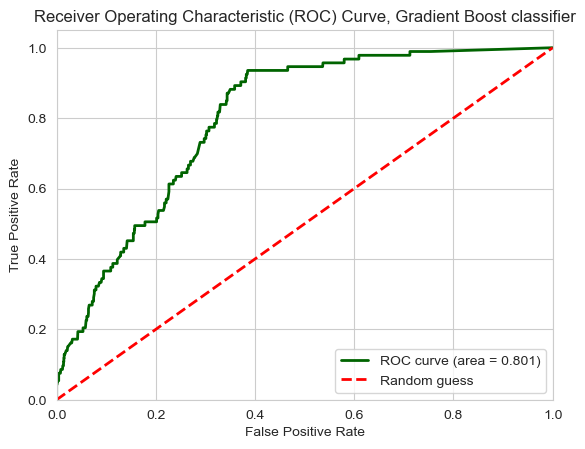

In [164]:
# to plot ROC curve for Gradient Boost classifier model
fpr, tpr, thresholds = roc_curve(y_test, gbc_test_pred_proba)
roc_auc = roc_auc_score(y_test, gbc_test_pred_proba)

# AUC score for Gradient Boost classifier = 0.8
plt.figure()
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Gradient Boost classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [165]:
# Gradient Boost classifier Validation set
gbc_val_cm = confusion_matrix(y_val, gbc_val_pred, normalize='true')
gbc_val_cm

array([[1.        , 0.        ],
       [0.95652174, 0.04347826]])

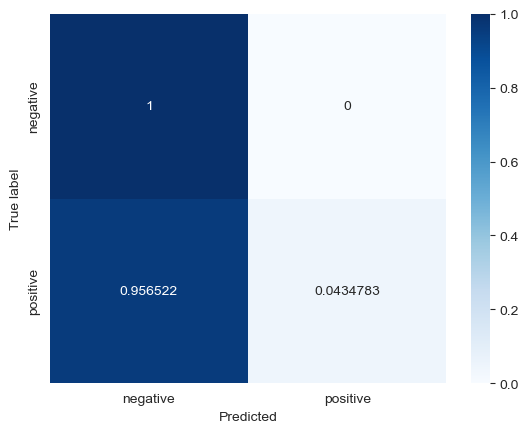

In [166]:
# to plot confusion matrix for Gradient Boost Classifier Validation set
# Accuracy rate for true positive (Fraud = 1) = 0.04347%
# accuracy rate for true negatives = 100%
def plot_cm(gbc_val_cm):
    classes = ['negative','positive']
    df_gbc_val_cm = pd.DataFrame(gbc_val_cm, index=classes, columns=classes)
    ax = sns.heatmap(df_gbc_val_cm, annot=True, fmt='g',cmap=plt.cm.Blues)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True label")

plot_cm(gbc_val_cm)
plt.show()

Confusion matrix, Gradient Boost classifier Test set


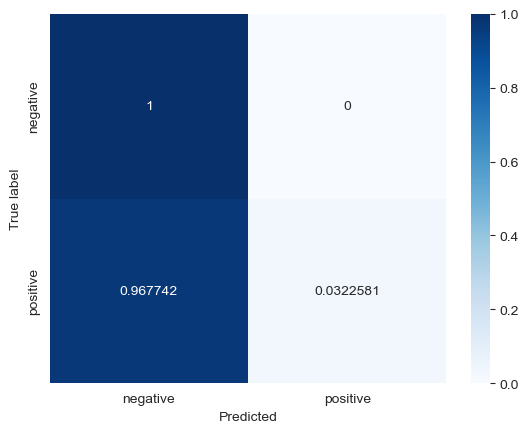

In [167]:
# low accuracy for the True positive class
# Accuracy rate for True positive (Fraud = 1) = 0.0322 %
print("Confusion matrix, Gradient Boost classifier Test set")
gbc_test_cm = confusion_matrix(y_test, gbc_test_pred, normalize='true')
plot_cm(gbc_test_cm)
plt.show()

In [168]:
gbc_model = gbc_clf.best_estimator_

In [169]:
gbc_feature_importances = gbc_model.feature_importances_

In [170]:
# Gradient Boost classifier feature importance
gbc_feature_importances

array([2.68162159e-04, 3.12457990e-04, 2.74148206e-02, 2.48709426e-03,
       2.68736301e-03, 2.32427106e-03, 6.35070881e-04, 9.19842265e-04,
       2.64816935e-04, 0.00000000e+00, 2.44063547e-03, 8.71494571e-08,
       0.00000000e+00, 5.51554803e-04, 5.55647500e-03, 0.00000000e+00,
       0.00000000e+00, 6.14444916e-05, 5.56015525e-04, 2.00467115e-03,
       1.01396162e-03, 1.77621386e-03, 0.00000000e+00, 1.90423369e-03,
       1.70910413e-03, 2.97632482e-03, 8.72273956e-04, 3.79201965e-03,
       2.71021188e-03, 1.04487999e-03, 3.83016120e-03, 2.34961672e-16,
       2.45918756e-04, 6.32984757e-05, 2.08498529e-02, 6.78916269e-03,
       1.33188293e-03, 2.83719635e-03, 1.71303702e-03, 3.01308099e-04,
       2.46488834e-03, 1.06911637e-03, 1.60738414e-02, 1.70294203e-03,
       6.77092946e-03, 9.83677469e-04, 1.32632455e-03, 9.96503751e-04,
       4.38547551e-04, 2.27284582e-01, 6.81723590e-02, 0.00000000e+00,
       0.00000000e+00, 1.62201590e-02, 0.00000000e+00, 0.00000000e+00,
      

In [171]:
pd.DataFrame(data=gbc_feature_importances, index= X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
Fault_Third Party,0.227285
BasePolicy_Liability,0.165235
AddressChange_Claim_2 to 3 years,0.157202
AgeOfPolicyHolder_31 to 35,0.087589
PolicyType_Sedan - Collision,0.068172
...,...
PolicyType_Utility - All Perils,0.000000
PolicyType_Utility - Collision,0.000000
PolicyType_Utility - Liability,0.000000
VehicleCategory_Sport,0.000000


In [172]:
# to read into a new df
gbc_feat_imp = pd.DataFrame(data=gbc_feature_importances, index= X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

In [173]:
# to filter away variables with 'Importance' less than 0
gbc_imp = gbc_feat_imp[gbc_feat_imp['Importance'] > 0.011]

In [174]:
gbc_imp 

,Importance
Fault_Third Party,0.227285
BasePolicy_Liability,0.165235
AddressChange_Claim_2 to 3 years,0.157202
AgeOfPolicyHolder_31 to 35,0.087589
PolicyType_Sedan - Collision,0.068172
AgeOfPolicyHolder_36 to 40,0.044417
Year,0.027415
MonthClaimed_Aug,0.020850
PolicyType_Sport - Collision,0.016220
MonthClaimed_Nov,0.016074


C:\Users\miche\AppData\Local\Temp\ipykernel_13260\884765067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gbc_imp , y=gbc_imp.index, x='Importance', palette='Paired')


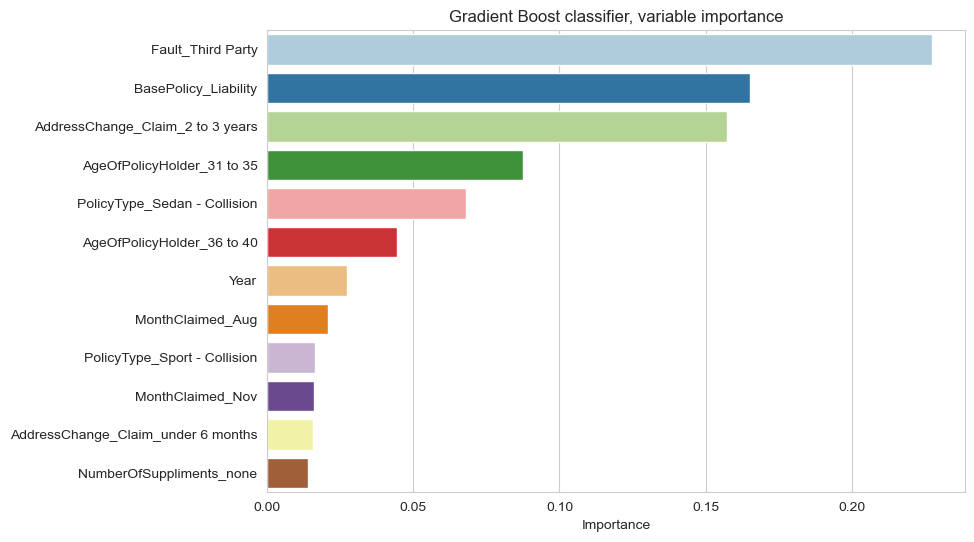

In [175]:
# to visualize Gradient Boost classifier in a bar plot
plt.figure(figsize=(9,6), dpi=100)
sns.barplot(data=gbc_imp , y=gbc_imp.index, x='Importance', palette='Paired')
plt.ylabel("")
plt.title("Gradient Boost classifier, variable importance", fontsize=12)
plt.show()